# Project 2: Ames Housing Data and Kaggle Challenge

### Problem Statement:  

The home appraiser's job is to determine your home's fair market value. When the lender orders the appraisal, it takes an average of three days before the appraiser's site visit takes place. Following the appraiser's site visit, it takes an average of three days for the appraiser to submit the appraisal report to the lender ([*source*](https://www.homelight.com/blog/what-do-home-appraisers-do/)).

In this project, I'll explore the Ames, Iowa Housing Data and determine the best model to predict the sale price of homes in Ames. This model will serve the home owners and real estate agents of Ames, Iowa and it will equip them with the ability to value their homes on their own. The model would also shorten the appraisal process by incorporating a machine learning system to compute the sale price of a house. The models that were developed are the linear regression model that includes feature engineering the numerical and categorical variables. The Ridge and LASSO regression methods were used to optimize the model with a better bias-variance tradeoff.   

Success will be evaluated by using the linear regression metrics: Coefficient of Determination (R2 score), the Mean Squared Error (MSE), and the Root Mean Squared Error (RMSE).

# Cleaning the Training Data Set

In this process, I initially looked through the null values in each feature. I separated the features by ordinal, nominal, discrete, and continuous variables. I noticed there were a lot of features that describe the house's quality, condition, location, and size.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read in data**

In [2]:
df = pd.read_csv('../datasets/train.csv')

To start, the train data set had a total of 80 features and 1 target variable which was the sale price.

In [3]:
df.shape

(2051, 81)

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Edit the columns to lower case strings and replace spaces with an underscore.

In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")

Separate Columns by Variable Types

In [6]:
#23 nominal cols - txt describing the property
nominal=['pid','ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1','condition_2','bldg_type','house_style','roof_style',
       'roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','heating','central_air','garage_type','misc_feature','sale_type']         
#23 ordinal cols - txt describing the property that provide order
ordinal = ['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
          'heating_qc','electrical','kitchen_qual','functional','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence']
#14 discrete cols - integer values
discrete = ['year_built','year_remod/add','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr','totrms_abvgrd','fireplaces','garage_yr_blt','garage_cars',
           'mo_sold','yr_sold']
#19 continuous cols - numeric values
continuous = ['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf',
              'gr_liv_area','garage_area','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area','misc_val']

### Initial Cleaning: Check for Null/Missing Values

**Nominal Data**  

I dropped four columns from the dataframe (pid, alley, mas vnr type, and misc feature). Pid was dropped since there were other variables (ms zoning and neighborhood) that would indicate the location of each house. Alley, masonry veneer type, and misc feature were removed since they all had significant quantities of null data (>50%).  

*Data Edits*  

- MS Subclass values were converted to strings
- MS Zoning data values were editted to improve spelling.
- Removed spaces in exterior 2nd data
- Null data entries in garage type (113 values) were filled with NA

In [7]:
df[nominal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pid           2051 non-null   int64 
 1   ms_subclass   2051 non-null   int64 
 2   ms_zoning     2051 non-null   object
 3   street        2051 non-null   object
 4   alley         140 non-null    object
 5   land_contour  2051 non-null   object
 6   lot_config    2051 non-null   object
 7   neighborhood  2051 non-null   object
 8   condition_1   2051 non-null   object
 9   condition_2   2051 non-null   object
 10  bldg_type     2051 non-null   object
 11  house_style   2051 non-null   object
 12  roof_style    2051 non-null   object
 13  roof_matl     2051 non-null   object
 14  exterior_1st  2051 non-null   object
 15  exterior_2nd  2051 non-null   object
 16  mas_vnr_type  2029 non-null   object
 17  foundation    2051 non-null   object
 18  heating       2051 non-null   object
 19  centra

In [8]:
df.drop(columns = ['id','pid','alley','misc_feature','mas_vnr_type'], inplace=True)

In [9]:
#identified and editted data values by sifting through each series in the df with .value_counts()
df['ms_subclass'] = df['ms_subclass'].astype(str)
df['ms_zoning'] = df['ms_zoning'].replace("C (all)", "C")
df['ms_zoning'] = df['ms_zoning'].replace("A (agr)", "A")
df['ms_zoning'] = df['ms_zoning'].replace("I (all)", "I")
df['exterior_2nd'] = df['exterior_2nd'].replace("Wd Sdng","WdSdng")
df['exterior_2nd'] = df['exterior_2nd'].replace("Brk Cmn","BrkCmn")
#Looking into this col, we see that there are 113 values missing. I replaced the null values with the string NA.
df['garage_type'].fillna("NA",inplace=True)

**Ordinal Data**  
The ordinal data did not have many null values. I filled null values with NA for the columns: bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_type_2, garage_finish, garage_qual, garage_cond, and fireplace_qu.

I dropped the pool and fence columns since both variables had a significant amount of null data.

In [10]:
df[ordinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lot_shape       2051 non-null   object
 1   utilities       2051 non-null   object
 2   land_slope      2051 non-null   object
 3   overall_qual    2051 non-null   int64 
 4   overall_cond    2051 non-null   int64 
 5   exter_qual      2051 non-null   object
 6   exter_cond      2051 non-null   object
 7   bsmt_qual       1996 non-null   object
 8   bsmt_cond       1996 non-null   object
 9   bsmt_exposure   1993 non-null   object
 10  bsmtfin_type_1  1996 non-null   object
 11  bsmtfin_type_2  1995 non-null   object
 12  heating_qc      2051 non-null   object
 13  electrical      2051 non-null   object
 14  kitchen_qual    2051 non-null   object
 15  functional      2051 non-null   object
 16  fireplace_qu    1051 non-null   object
 17  garage_finish   1937 non-null   object
 18  garage_q

In [11]:
df.drop(columns=['pool_qc','fence'],inplace=True)
df['bsmt_qual'].fillna("NA",inplace=True)
df['bsmt_cond'].fillna("NA",inplace=True)
df['bsmt_exposure'].fillna("NA",inplace=True)
df['bsmtfin_type_1'].fillna("NA",inplace=True)
df['bsmtfin_type_2'].fillna("NA",inplace=True)
df['garage_finish'].fillna("NA",inplace=True)
df['garage_qual'].fillna("NA",inplace=True)
df['garage_cond'].fillna('TA', inplace=True)
df['fireplace_qu'].fillna("NA",inplace=True)

**Discrete Data**  

Drop month sold column, the data from the year sold will suffice. There were 114 null values for garage year built, I proceeded to drop that column since adding a 0 for null values would affect the model. The year the garage was built is another variable that is highly dependent on existing features such as the year the house was built.

*Data Edits*  
- 2 null values for both bsmt full bath and bsmt half bath filled with 0 (mode of the values) 
- 1 null value for garage cars, assigned a zero for the null value in garage cars

In [12]:
df[discrete].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year_built      2051 non-null   int64  
 1   year_remod/add  2051 non-null   int64  
 2   bsmt_full_bath  2049 non-null   float64
 3   bsmt_half_bath  2049 non-null   float64
 4   full_bath       2051 non-null   int64  
 5   half_bath       2051 non-null   int64  
 6   bedroom_abvgr   2051 non-null   int64  
 7   kitchen_abvgr   2051 non-null   int64  
 8   totrms_abvgrd   2051 non-null   int64  
 9   fireplaces      2051 non-null   int64  
 10  garage_yr_blt   1937 non-null   float64
 11  garage_cars     2050 non-null   float64
 12  mo_sold         2051 non-null   int64  
 13  yr_sold         2051 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 224.5 KB


In [13]:
df.rename(columns = {'kitchen_abvgr':'kitchen'}, inplace=True)
df.drop(columns = ['garage_yr_blt','mo_sold'], inplace=True)
df['bsmt_full_bath'].fillna(0, inplace=True)
df['bsmt_half_bath'].fillna(0, inplace=True)
df['garage_cars'].fillna(0, inplace=True)

**Continuous Data**  

The pool area had significant amount of null values, I wanted to dig deeper into this by determining if the presence of a pool would have a significant impact of the sale price of a home. The misc val variable is also worth dropping, 97% of the houses in Ames, Iowa have a value of 0. I also noticed some redundant data that would feed into other variables (ex: basement sq ft, above ground sq ft, porch sq ft). I will do a closer dive into these variables later in the analysis.

*Data Edits*  
- Lot frontage had a total of 330 null values. The null values were filled with the mean value of lot frontage (69 linear ft)
- 22 null values for mas vnr area. The null values were filled with the mode which was 0 sq ft
- Bsmt fin 1 and 2 had one null value. Both were filled with the mode which was 0 sq ft
- Garage Area had 1 null value, this was replaced with the mode which was 0 sq ft
- Bsmt unf sf had 1 null value, this was replaced with the mean which was 568 sq ft
- Total bsmt sf had 1 null value, this was replaced with the mean which was 1058 sq ft

In [14]:
df[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lot_frontage     1721 non-null   float64
 1   lot_area         2051 non-null   int64  
 2   mas_vnr_area     2029 non-null   float64
 3   bsmtfin_sf_1     2050 non-null   float64
 4   bsmtfin_sf_2     2050 non-null   float64
 5   bsmt_unf_sf      2050 non-null   float64
 6   total_bsmt_sf    2050 non-null   float64
 7   1st_flr_sf       2051 non-null   int64  
 8   2nd_flr_sf       2051 non-null   int64  
 9   low_qual_fin_sf  2051 non-null   int64  
 10  gr_liv_area      2051 non-null   int64  
 11  garage_area      2050 non-null   float64
 12  wood_deck_sf     2051 non-null   int64  
 13  open_porch_sf    2051 non-null   int64  
 14  enclosed_porch   2051 non-null   int64  
 15  3ssn_porch       2051 non-null   int64  
 16  screen_porch     2051 non-null   int64  
 17  pool_area     

In [15]:
df.drop(columns='misc_val', inplace=True)
df['lot_frontage'].fillna(69, inplace=True)
df['mas_vnr_area'].fillna(0, inplace=True)
df['bsmtfin_sf_1'].fillna(0, inplace=True)
df['bsmtfin_sf_2'].fillna(0, inplace=True)
df['garage_area'].fillna(0, inplace=True)
df['bsmt_unf_sf'].fillna(568, inplace=True)
df['total_bsmt_sf'].fillna(1058, inplace=True)

Dropped 10 columns from initial clean = id, pid, alley, misc_feature, mas_vnr_type, pool_qc, fence, garage_yr_blt, pool_area, misc_val

In [16]:
df.shape

(2051, 71)

### Initial Check for Dependent Features  

The square footage of a house that got factored into different predictor variables were: garage area, total sq ft(above ground and basement sq ft), porch sq ft. There were a number of features that were dependent on each other. This allowed me to reduce the number of variables that I would factor in my model. Highlights of the changes are listed below:  
- Bathroom data was united under the total number of bathrooms
- Extra rooms column was created to eliminate the total rooms column (total rooms - kitchens - bedrooms)
- Total sqft of a home was calculated by combining the basement sf and the above ground sf 
- Porch sqft was combined by summing the sq ft of all the different types of porches

Later in the model tuning process, I incorporated a Pearson correlation analysis to ensure my predictor variables were independent of each other.

In [17]:
df['total_bath'] = df['bsmt_full_bath'] + df['bsmt_half_bath']*0.5 + df['full_bath'] + df['half_bath']*0.5

Extra rooms variable was calculated by subtracting the number of kitchens and bedrooms from the total rooms.

In [18]:
df['extra_rms'] = df['totrms_abvgrd'] - df['kitchen'] - df['bedroom_abvgr']

The ground living area is the sum of the 1st floor, 2nd floor, and low qual finish sq ft.

In [19]:
df[['1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area']].head()

,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area
0,725,754,0,1479
1,913,1209,0,2122
2,1057,0,0,1057
3,744,700,0,1444
4,831,614,0,1445


The basement predictors were combined to give a total basement sq ft area. 

In [20]:
df[['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']].head()

,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
0,533.0,0.0,192.0,725.0
1,637.0,0.0,276.0,913.0
2,731.0,0.0,326.0,1057.0
3,0.0,0.0,384.0,384.0
4,0.0,0.0,676.0,676.0


Group the total sq ft of the basement and the gr liv area under a new column called total sf

In [21]:
df['total_sf'] = df['total_bsmt_sf'] + df['gr_liv_area']

Group porch/deck data into one predictor: porch_sf

In [22]:
df['porch_sf'] = df['screen_porch']+df['3ssn_porch']+df['enclosed_porch']+df['open_porch_sf']+df['wood_deck_sf']

**Binarize Features**
- basement
- pool
- garage
- porch
- has extra rooms

The features I determined to binarize are the properties of a house that may affect the salesprice by either being present or not present. If the house had a particular feature, it was given the value of 1 else 0. The function binarize was created to create these values. 

In [23]:
def binarize(col):
    new_col = [int(1) if i > 1 else int(0) for i in col]
    return new_col

In [24]:
df['has_bsmt'] = binarize(df['total_bsmt_sf'])
df['has_bsmt'].value_counts()

1    1997
0      54
Name: has_bsmt, dtype: int64

In [25]:
df['has_pool'] = binarize(df['pool_area']) 
df['has_pool'].value_counts()

0    2042
1       9
Name: has_pool, dtype: int64

In [26]:
df['has_porch'] = binarize(df['porch_sf'])
df['has_porch'].value_counts()

1    1707
0     344
Name: has_porch, dtype: int64

In [27]:
df['has_2fl'] = binarize(df['2nd_flr_sf'])
df['has_2fl'].value_counts()

0    1191
1     860
Name: has_2fl, dtype: int64

In [28]:
df['has_garage'] = binarize(df['garage_area'])
df['has_garage'].value_counts()

1    1937
0     114
Name: has_garage, dtype: int64

In [29]:
df['has_fireplace'] = binarize(df['fireplaces'])
df['has_fireplace'].value_counts()

0    1898
1     153
Name: has_fireplace, dtype: int64

In [30]:
df['has_extrms'] = binarize(df['extra_rms'])
df['has_extrms'].value_counts()

1    1741
0     310
Name: has_extrms, dtype: int64

Drop dependent columns

In [31]:
df.drop(columns=['screen_porch','3ssn_porch','enclosed_porch','open_porch_sf','wood_deck_sf','total_bsmt_sf','gr_liv_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf',
                '1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','totrms_abvgrd','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath'], inplace=True)

# EDA

The distribution of the sale price was skewed right. After a log transformation of the target variable, the sale price distribution followed a normal distribution.  From the correlation heatmap below, the overall quality and the total sq ft of a home have a strong positive correlation with the sale price. The nominal features of the house were visualized to see the distribution of the features and also see if the features were worth considering in our model. The distribution was plotted against the relationship between the total square footage of a house and the price of the home.

In [32]:
df['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

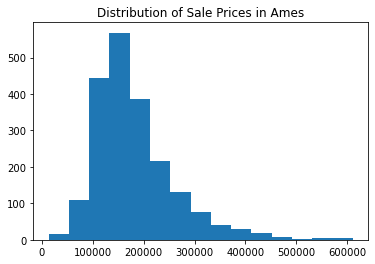

In [33]:
plt.hist(df['saleprice'], bins=15);
plt.title('Distribution of Sale Prices in Ames');

The sale price follows a normal distribution after a log function is added

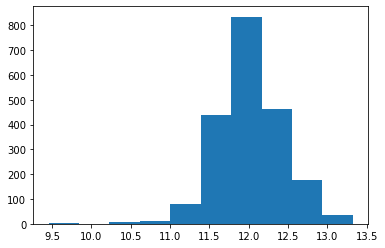

In [34]:
plt.hist(np.log(df['saleprice']), bins=10);

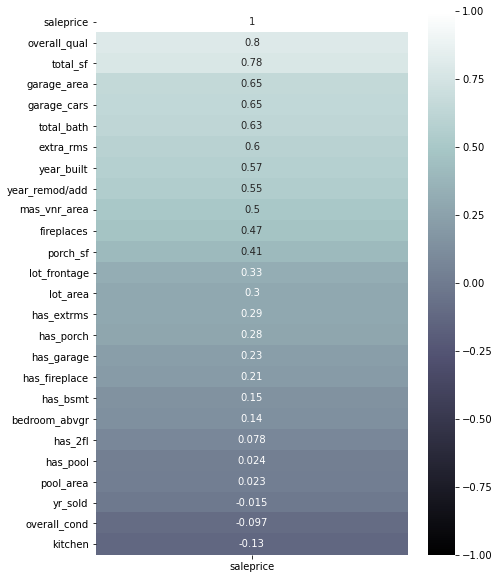

In [35]:
plt.figure(figsize=(7,10))
corr = df.corr()
sns.heatmap(corr[['saleprice']].sort_values(by='saleprice',ascending=False), vmin=-1, vmax=1, cmap = 'bone', annot=True);

We see that there are two outliers that have over 10000 sq ft. Drop these two values.

In [36]:
y = np.log(df['saleprice'])

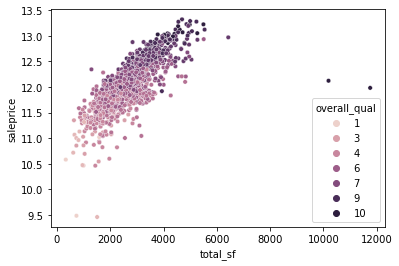

In [37]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['overall_qual'], s=20);

In [38]:
df = df[df['total_sf'] < 10000]

### Nominal EDA

Drop this the ms subclass outliers shown in this plot

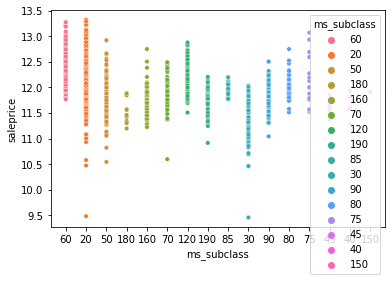

In [39]:
sns.scatterplot(x=df['ms_subclass'], y=y, hue=df['ms_subclass'], s=20);

In [40]:
df = df.loc[(np.log(df['saleprice']) > 10)]

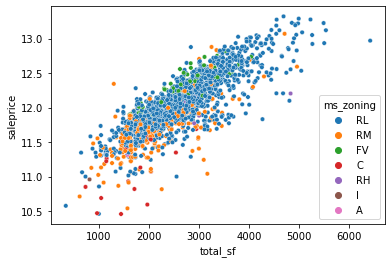

In [41]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['ms_zoning'], s=20);

In [42]:
df['ms_zoning'].value_counts()

RL    1596
RM     315
FV     101
C       19
RH      14
A        1
I        1
Name: ms_zoning, dtype: int64

There are only 7 houses with gravel road access to the property. Drop this columnn.

In [43]:
df['street'].value_counts()

Pave    2040
Grvl       7
Name: street, dtype: int64

In [44]:
df.drop(columns = 'street',inplace=True)

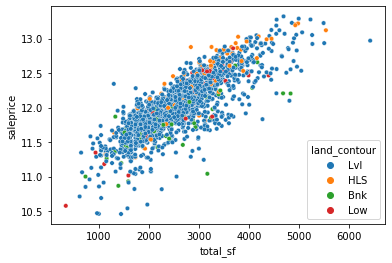

In [45]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['land_contour'], s=20);

In [46]:
df['land_contour'].value_counts()

Lvl    1842
HLS      85
Bnk      78
Low      42
Name: land_contour, dtype: int64

The variable lot config was dropped, there is no trend given the visualization and distribution of data.

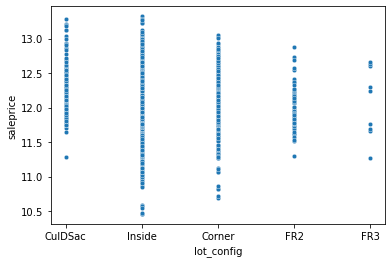

In [47]:
sns.scatterplot(x=df['lot_config'], y=y, s=20);

The condition 2 feature was dropped. 98.7% of the homes are normal

In [48]:
df['condition_2'].value_counts()

Norm      2021
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

In [49]:
df.drop(columns = 'condition_2', inplace=True)

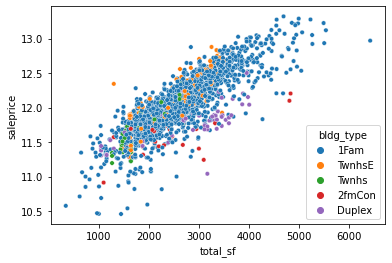

In [50]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['bldg_type'], s=20);

In [51]:
df.groupby('bldg_type')['saleprice'].describe()

,count,mean,std,min,25%,50%,75%,max
bldg_type,,,,,,,,
1Fam,1696.0,185494.650354,81792.461182,34900.0,130875.0,165325.0,219500.0,611657.0
2fmCon,46.0,123179.891304,30304.813341,55000.0,101187.5,121200.0,139875.0,200000.0
Duplex,75.0,139296.333333,40824.044796,62500.0,118250.0,136000.0,148991.5,269500.0
Twnhs,69.0,133100.000000,37977.260030,73000.0,100000.0,134000.0,160000.0,230000.0
TwnhsE,161.0,198312.372671,65866.184832,79400.0,147000.0,184000.0,234250.0,392500.0


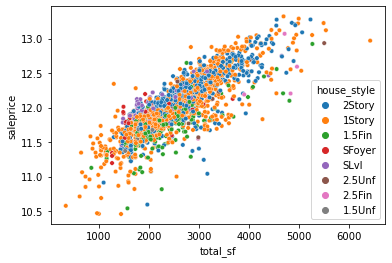

In [52]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['house_style'], s=20);

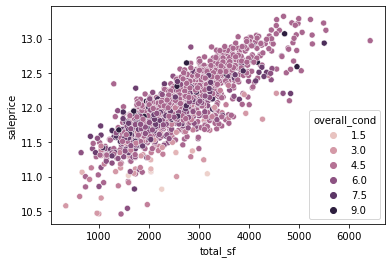

In [53]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['overall_cond']);

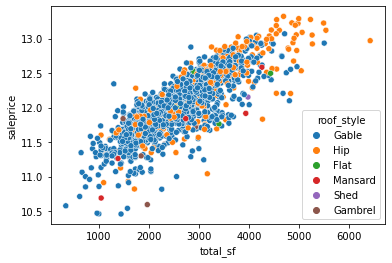

In [54]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['roof_style']);

Drop roof matl col


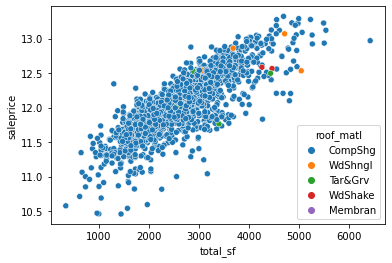

In [55]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['roof_matl']);

In [56]:
df['roof_matl'].value_counts()

CompShg    2022
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
Name: roof_matl, dtype: int64

In [57]:
df.drop(columns='roof_matl', inplace=True)

Drop the exterior 1st and 2nd column. The data does not show a strong trend and adds complexity to the model. 

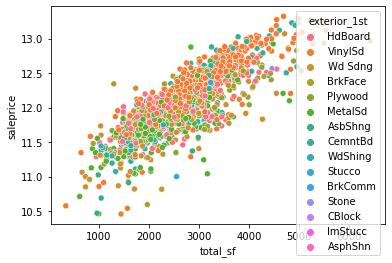

In [58]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['exterior_1st']);

In [59]:
df.drop(columns='exterior_1st', inplace=True)

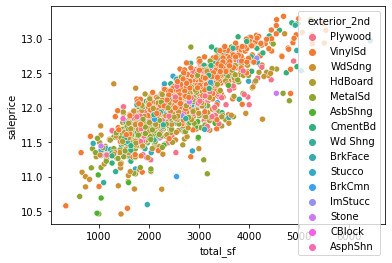

In [60]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['exterior_2nd']);

In [61]:
df.drop(columns='exterior_2nd', inplace=True)

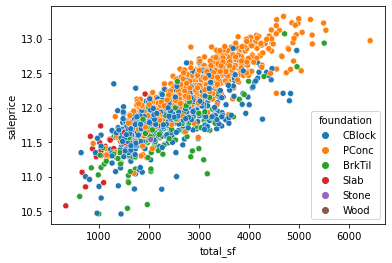

In [62]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['foundation']);

Drop the heating column 98% of homes have gas heating

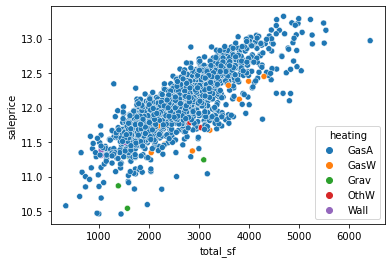

In [63]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['heating']);

In [64]:
df['heating'].value_counts()

GasA    2015
GasW      20
Grav       5
Wall       5
OthW       2
Name: heating, dtype: int64

In [65]:
df.drop(columns='heating',inplace=True)

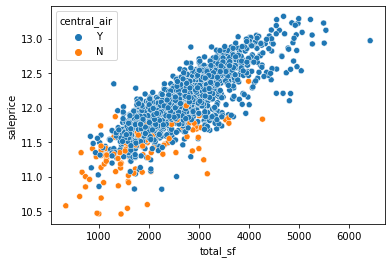

In [66]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['central_air']);

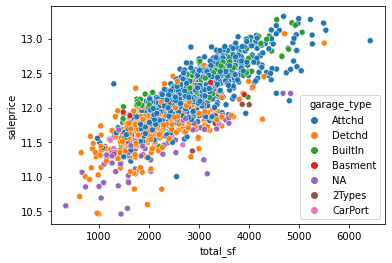

In [67]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['garage_type']);

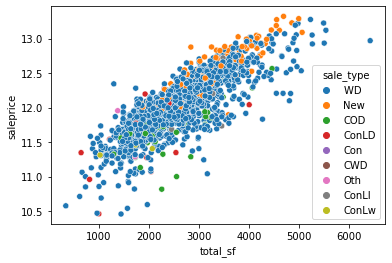

In [68]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['sale_type']);

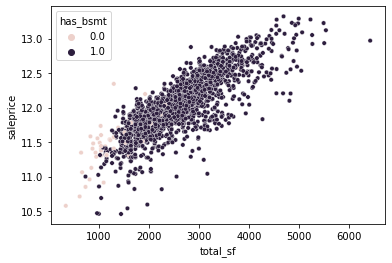

In [69]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['has_bsmt'], s=20);

The pool variable will not be factored in the model, the scatterplot does not show any major trends worth noting. The majority of the homes in Ames, Iowa do not have a pool.

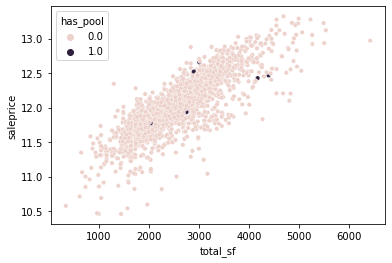

In [70]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['has_pool'], s=20);

In [71]:
df.drop(columns='pool_area', inplace=True)

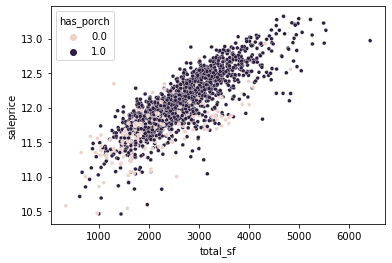

In [72]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['has_porch'], s=15);

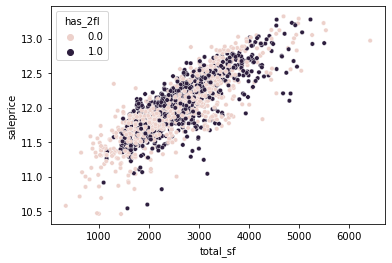

In [73]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['has_2fl'], s=20);

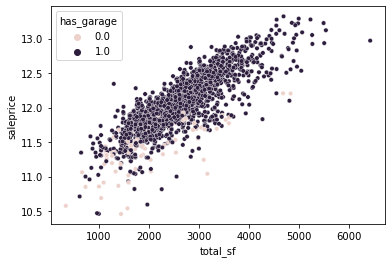

In [74]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['has_garage'], s=20);

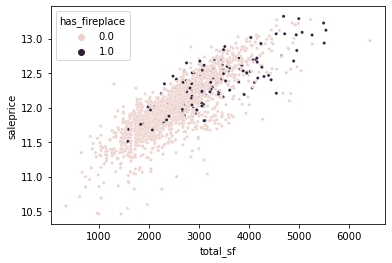

In [75]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['has_fireplace'], s=10);

### Neighborhoods

In [76]:
df.groupby('neighborhood')[['saleprice']].describe()

saleprice                                                     \
                 count           mean            std       min        25%   
neighborhood                                                                
Blmngtn           22.0  200417.681818   27447.004922  159895.0  180250.00   
Blueste            6.0  144566.666667   26089.589239  121000.0  123925.00   
BrDale            19.0  103371.052632   11262.318142   85400.0   93750.00   
BrkSide           76.0  127022.697368   34825.975741   39300.0  109375.00   
ClearCr           27.0  217490.074074   53479.942309  130000.0  177500.00   
CollgCr          180.0  202497.216667   54022.918602  110000.0  164740.00   
Crawfor           71.0  205901.211268   60856.738509   90350.0  158250.00   
Edwards          141.0  129905.787234   51225.782591   35000.0  100000.00   
Gilbert          116.0  189228.387931   32434.069509  133000.0  172281.25   
Greens             3.0  188666.666667   18036.999011  170000.0  180000.00   
GrnHill            2.0  280000.000000   70710.678119  230000.0  255000.00   
IDOTRR            68.0  102397.352941   36604.418537   34900.0   74250.00   
Landmrk            1.0  137000.000000            NaN  137000.0  137000.00   
MeadowV           24.0  100231.250000   21955.012365   73000.0   84875.00   
Mitchel           82.0  167656.707317   41581.768146   81500.0  136375.00   
NAmes            310.0  145905.816129   31748.016563   68000.0  128000.00   
NPkVill           17.0  140476.470588   10285.762576  120000.0  137500.00   
NWAmes            87.0  194619.022989   39628.081135  113000.0  171000.00   
NoRidge           48.0  316294.125000   67015.947652  190000.0  279875.00   
NridgHt          122.0  322831.352459   92964.835768  154000.0  259279.00   
OldTown          162.0  125970.666667   47200.361874   37900.0  105000.00   
SWISU             32.0  134758.875000   33074.560117   60000.0  111125.00   
Sawyer           111.0  137181.909910   24163.036900   62383.0  124550.00   
SawyerW           87.0  187760.160920   50508.254983   82000.0  148491.50   
Somerst          130.0  227183.900000   55518.617822  144152.0  180500.00   
StoneBr           38.0  329675.736842  128597.738212  130000.0  218125.00   
Timber            48.0  241051.354167   70247.203305  137500.0  180375.00   
Veenker           17.0  253570.588235   69147.647869  150000.0  192000.00   

                                             
                   50%        75%       max  
neighborhood                                 
Blmngtn       192250.0  218742.50  264561.0  
Blueste       137500.0  159625.00  185000.0  
BrDale        105500.0  111875.00  122500.0  
BrkSide       128000.0  139975.00  223500.0  
ClearCr       225000.0  250500.00  328000.0  
CollgCr       200000.0  225250.00  475000.0  
Crawfor       199500.0  235250.00  392500.0  
Edwards       123500.0  140000.00  415000.0  
Gilbert       180750.0  193625.00  377500.0  
Greens        190000.0  198000.00  206000.0  
GrnHill       280000.0  305000.00  330000.0  
IDOTRR        102388.0  126250.00  202500.0  
Landmrk       137000.0  137000.00  137000.0  
MeadowV        92450.0  117250.00  151400.0  
Mitchel       160000.0  188000.00  300000.0  
NAmes         141000.0  159000.00  345000.0  
NPkVill       143000.0  148500.00  155000.0  
NWAmes        185000.0  214125.00  306000.0  
NoRidge       300750.0  337750.00  584500.0  
NridgHt       317500.0  379040.50  611657.0  
OldTown       120000.0  140562.50  475000.0  
SWISU         136200.0  157608.50  200000.0  
Sawyer        135000.0  149950.00  219000.0  
SawyerW       181000.0  222121.50  320000.0  
Somerst       224000.0  257375.00  468000.0  
StoneBr       322450.0  427085.00  591587.0  
Timber        220000.0  281409.75  425000.0  
Veenker       260000.0  290000.00  385000.0

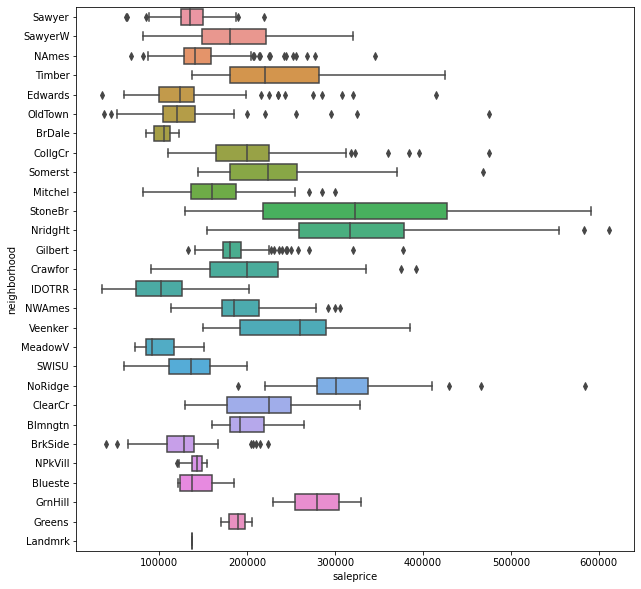

In [77]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.figure(figsize=(10,10))
ax = sns.boxplot(x='saleprice',y='neighborhood', data=df, orient ='h');

### ORDINAL EDA

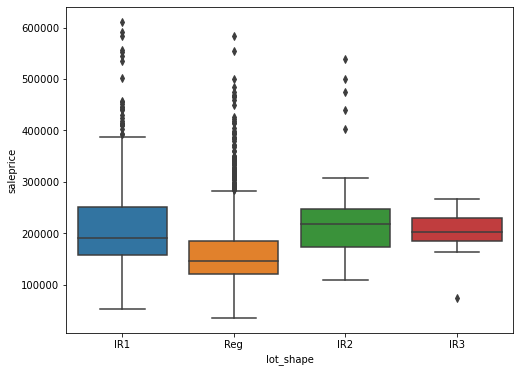

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x= 'lot_shape', y= 'saleprice');

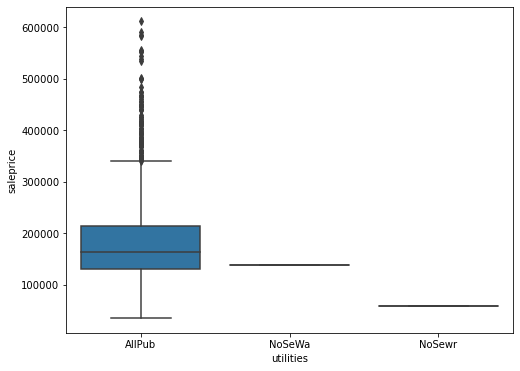

In [79]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='utilities', y='saleprice');

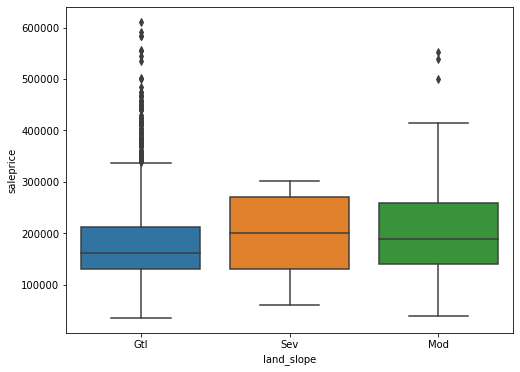

In [80]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='land_slope', y='saleprice');

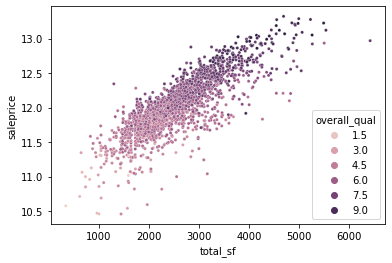

In [81]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['overall_qual'], s=10);

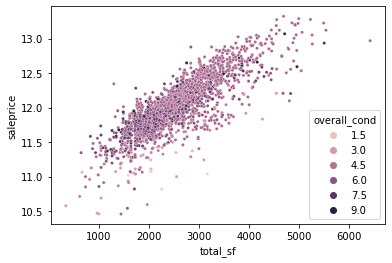

In [82]:
sns.scatterplot(x=df['total_sf'], y=y, hue=df['overall_cond'], s=10);

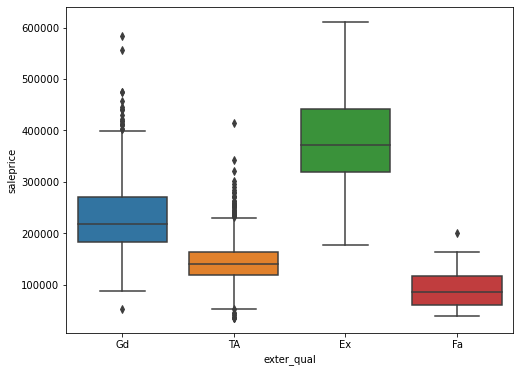

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='exter_qual', y='saleprice');

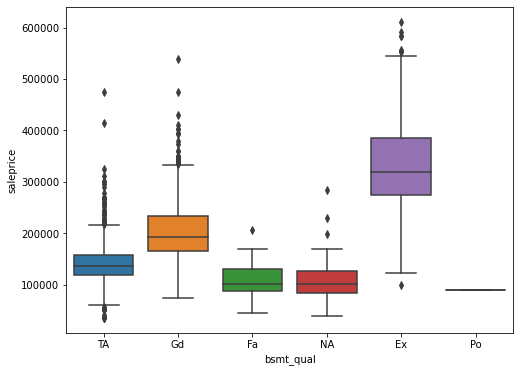

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='bsmt_qual', y='saleprice');

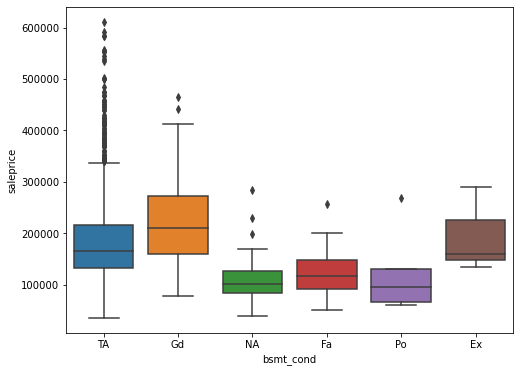

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='bsmt_cond', y='saleprice');

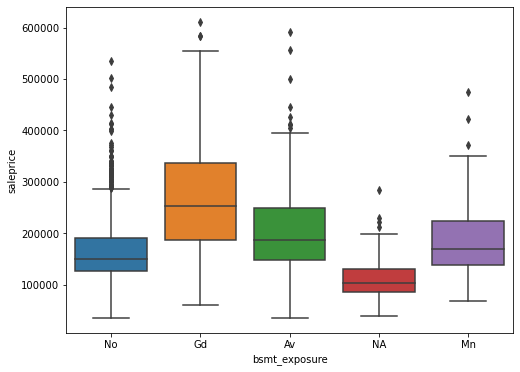

In [86]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='bsmt_exposure', y='saleprice');

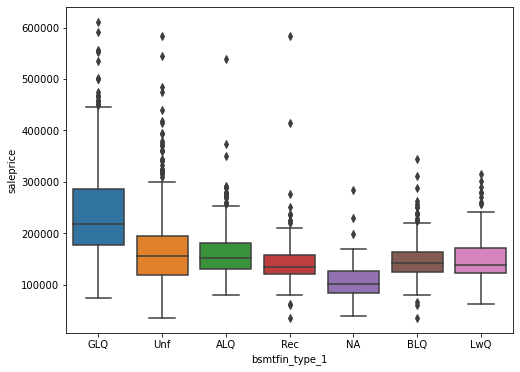

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='bsmtfin_type_1', y='saleprice');

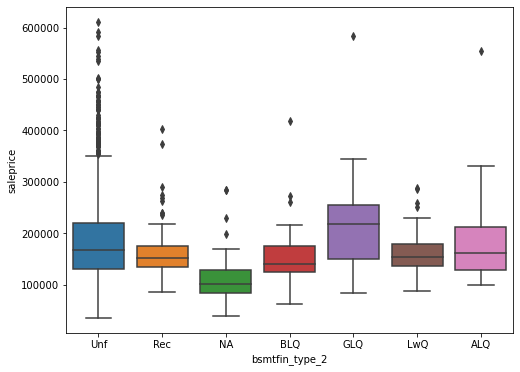

In [88]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='bsmtfin_type_2', y='saleprice');

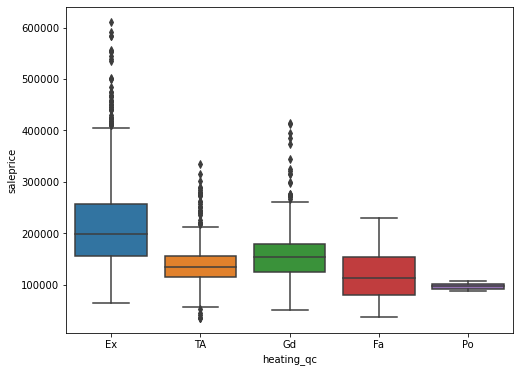

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='heating_qc', y='saleprice');

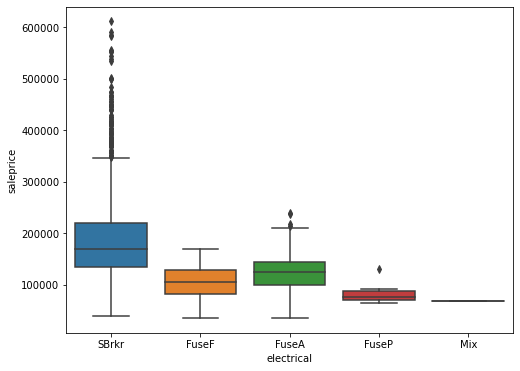

In [90]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='electrical', y='saleprice');

In [91]:
df['electrical'].value_counts()

SBrkr    1865
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

In [92]:
df.drop(columns='electrical', inplace=True)

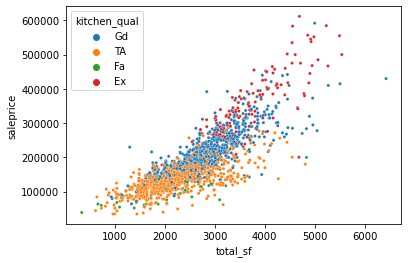

In [93]:
sns.scatterplot(x=df['total_sf'], y=df['saleprice'], hue=df['kitchen_qual'], s=10);

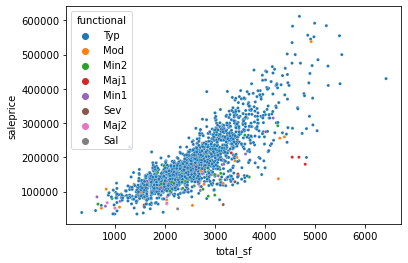

In [94]:
sns.scatterplot(x=df['total_sf'], y=df['saleprice'], hue=df['functional'], s=10);

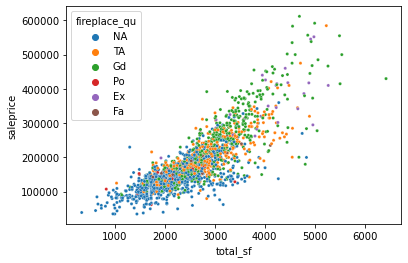

In [95]:
sns.scatterplot(x=df['total_sf'], y=df['saleprice'], hue=df['fireplace_qu'], s=10);

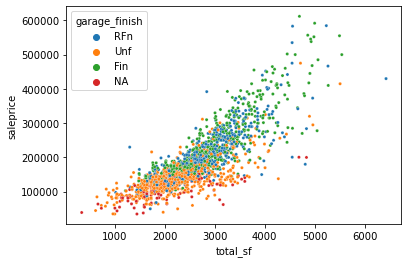

In [96]:
sns.scatterplot(x=df['total_sf'], y=df['saleprice'], hue=df['garage_finish'], s=10);

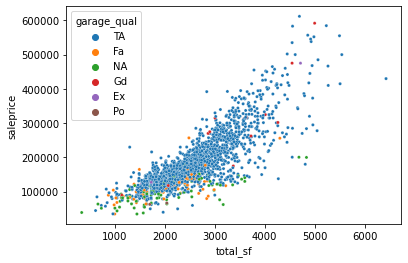

In [97]:
sns.scatterplot(x=df['total_sf'], y=df['saleprice'], hue=df['garage_qual'], s=10);

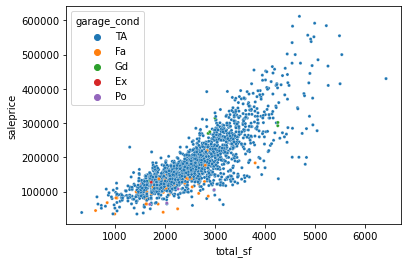

In [98]:
sns.scatterplot(x=df['total_sf'], y=df['saleprice'], hue=df['garage_cond'], s=10);

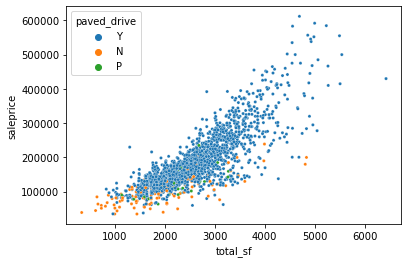

In [99]:
sns.scatterplot(x=df['total_sf'], y=df['saleprice'], hue=df['paved_drive'], s=10);

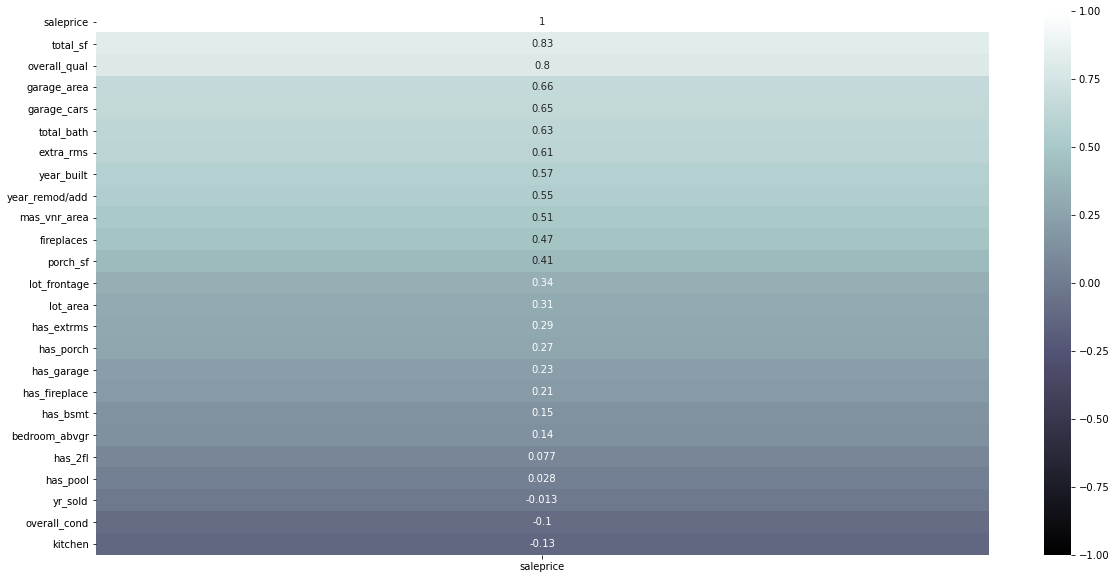

In [100]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr[['saleprice']].sort_values(by='saleprice',ascending=False), vmin=-1, vmax=1, cmap = 'bone', annot=True);

### EDA Conclusions

From the initial EDA, I determined I had more than enough information to generate a model to predict the sale price of homes in Ames, Iowa. The immediate issue that arises would be the number of variables I will be including in the model. There is a strong chance that the variables have collinearity and that the model will have high variance.

### Cleaning and Matching Training Data Set

This section shows the cleaning conducted so that the values in the testing data set are accounted for properly in the training data set. The values that were not present in the test and train data set are accounted for here.

In [101]:
ames=df

In [102]:
ames = ames.loc[(ames['foundation'] != 'Slab') & (ames['foundation'] != 'Wood')]
ames.drop(columns = 'ms_zoning', inplace=True)
ames.drop(columns = 'bsmt_cond', inplace=True)
ames.drop(columns = 'bsmt_qual', inplace=True)
ames.drop(columns = ['bsmtfin_type_1', 'bsmtfin_type_2'], inplace=True)
ames.drop(columns = 'functional', inplace=True)
ames.drop(columns = 'has_pool', inplace=True)
ames.drop(columns = 'fireplace_qu', inplace=True)
ames.drop(columns = 'heating_qc', inplace=True)
ames = ames.loc[(ames['neighborhood'] != 'GrnHill') & (ames['neighborhood'] != 'Landmrk')]
ames = ames.loc[ames['overall_qual'] > 2]
ames.drop(columns = 'utilities', inplace=True)
ames.drop(columns = 'garage_type', inplace=True)
ames.drop(columns = 'garage_finish', inplace=True)
ames.drop(columns = 'exter_cond', inplace=True)
ames.drop(columns = 'garage_qual', inplace=True)
ames.drop(columns='sale_type', inplace=True)
ames.drop(columns = 'bsmt_exposure', inplace=True)

C:\Users\bcho9\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Fine Tuning the Model

### Pearson Correlation Matrix   

The Pearson Correlation Matrix was used to find numeric variables that were dependent of each other. Variables that had a significant dependency of each other were dropped. Ultimately, I want to ensure that the predictor variables are independent of each other.

In [103]:
#method to find numeric cols received from: https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
category = ['object']
df_num = ames.select_dtypes(include=numerics)
df_cat = ames.select_dtypes(include=category)
n_vars = df_num.columns
c_vars = df_cat.columns

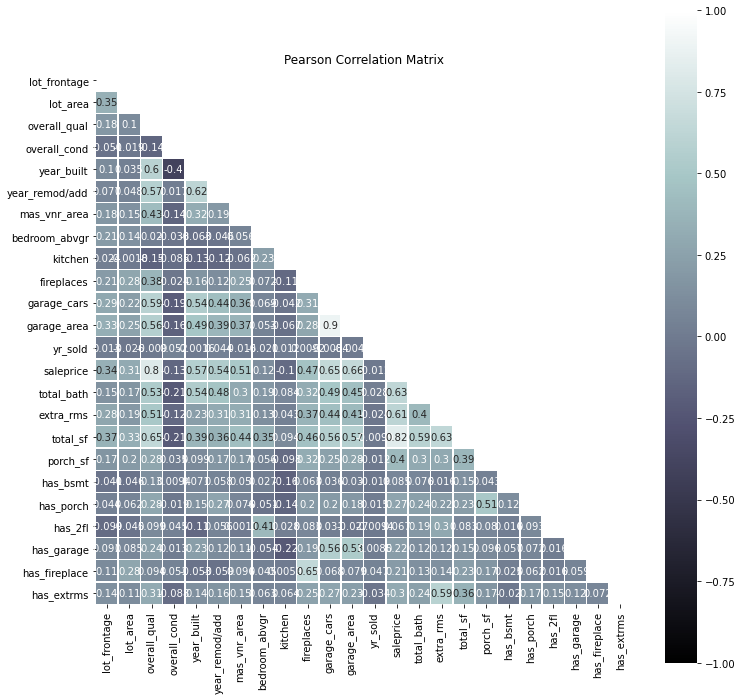

In [104]:
#instructions to plot a pearson correlation matrix was found: https://likegeeks.com/python-correlation-matrix/
pearson = ames[n_vars].corr(method='pearson')
corr=pearson
plt.subplots(figsize=(12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin=-1, vmax=1, cmap='bone', annot= True, square = True, linewidths=.5, mask=mask)

plt.title('Pearson Correlation Matrix');

In [105]:
ames.drop(columns = ['fireplaces','garage_area','year_built','overall_qual','has_garage','has_bsmt','overall_cond','extra_rms','year_remod/add'], inplace=True)

In [106]:
ames.to_csv('../datasets/ames_v1.csv', index=False)